In [3]:
import matplotlib.pyplot as plt
import numpy as np

import methods

w: [2.00292522 0.93856044 0.3283761 ], iter: 1201


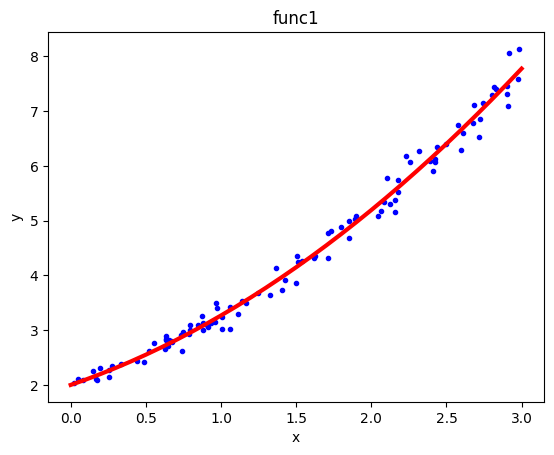

In [4]:
np.random.seed(1212)


def generate_points(n, dim, f, rg=1):
    X = rg * np.random.rand(n, dim)
    y = []
    X_err = X + 0.1 * np.random.randn(n, dim)
    i = 0
    for x in X_err:
        y.append(f(x))
        i += 1
    return X, np.asarray(y)


def poly_mse(X, y, dim, w, reg):
    res = 0
    for i in range(len(X)):
        x = 0
        for j in range(dim):
            x += (X[i] ** j) * w[j]
        res += (y[i][0] - x[0]) ** 2
    res += reg(w)
    return res / len(X)


def mse_func(X, y, dim, reg=lambda w: 0):
    return lambda w: poly_mse(X, y, dim, w, reg)


def grad_calculator(x, func, dim):
    h = 1e-5
    res = []
    for i in range(dim):
        delta = np.zeros(dim)
        delta[i] = h
        res.append((func(x + delta) - func(x - delta)) / (2 * h))
    return np.asarray(res)


def grad_func(f, dim):
    return lambda x: grad_calculator(x, f, dim)


func = lambda x: 2 + x + 0.3 * x ** 2
n = 100
dim = 1
f_dim = 3
rg = 3
(X, y) = generate_points(n, dim, func, rg)
L1 = lambda alpha: lambda weights: alpha * sum(np.abs(weights))
L2 = lambda alpha: lambda weights: alpha * sum(np.square(weights))
Elastic = lambda alpha1, alpha2: lambda weights: L1(alpha1)(weights) + L2(alpha2)(weights)
f = mse_func(X, y, f_dim)
grad = grad_func(f, f_dim)

lr = lambda x: 1
start = np.zeros(f_dim)

(points, iter, _) = methods.sgd_adagrad(f, grad, start, eps_g=1e-4, learning_rate=lr, max_iter=100000)
w = points[-1]
print("w: {}, iter: {}".format(w, iter))


def multiply_x_w(X, w, dim):
    res = []
    for i in range(len(X)):
        cur = 0
        for j in range(dim):
            cur += (X[i] ** j) * w[j]
        res.append(cur)
    return res


plt.plot(X, y, 'b.')
t1 = np.arange(0.0, rg + 0.01, 0.1)
Y = multiply_x_w(t1, w, f_dim)
plt.plot(t1, Y, '-', color='r', linewidth=3)
plt.title('func1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
